In [1]:
# Common imports
import numpy as np
import os

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

In [3]:
##########  Using gym
import gym

In [68]:
# Matriz de probabilidad de transición
transition_probabilities = [ # shape=[s, a, s']
    [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0]], # acción 0 (arriba)
    [[0.0, 0.0, 1.0, 0.0], None, [1.0, 0.0, 0.0, 0.0], None], # acción 1 (derecha)
    [[0.0, 1.0, 0.0, 0.0], [0.8, 0.0, 0.0, 0.2], None, None], # acción 2 (abajo)
    [[1.0, 0.0, 0.0, 0.0], None, [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0]], # acción 3 (izquierda)
]

rewards = [[[-1, -100, -1, -1], [-1, -100, -1, -1], [-1, -100, -1, -1], [10, 10, 10, 10], [-1, -100, -1, -1], [-1, -100, -1, -1], [-1, -100, -1, -1], [-1, -100, -1, -1], [-1, -100, -1, -1], [-1, -100, 40, -1], [-1, -100, -1, -50]],
           [[-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -100], [-1, -1, -1, -1]],
           [[-1, 10, -1, -100], [-1, 10, -1, -100], [-1, 10, -1, -100], [-1, 10, -1, -100], [-1, 10, -1, -100], [-1, 10, -1, -100], [-1, 10, -1, -100], [-1, 10, -1, -100], [-1, 10, -1, -100], [-1, 10, 40, -1], [-1, 10, -1, -50]],
           [[10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, -100], [10, -1, -1, 0]]]

possible_actions = [
    [0, 1, 2, 3],  # casillas 0-10 de la fila superior
    [0, 1, 2, 3],  # casillas 0-10 de la segunda fila
    [0, 1, 2, 3],  # casillas 0-10 de la tercera fila
    [0, 1, 2, 3],   # casilla de meta (todas las acciones llevan de vuelta al estado final)
    [0, 1, 2, 3],  # casillas 12-22 de la fila inferior
    [0, 1, 2, 3],  # casillas 13-23 de la penúltima fila
    [0, 1, 2, 3],  # casillas 14-24 de la última fila
    [0, 1, 2, 3],  # casillas 25-35 de la fila superior
    [0, 1, 2, 3],  # casillas 26-36 de la segunda fila
    [0, 1, 2, 3],  # casillas 27-37 de la tercera fila
    [0, 1, 2, 3],  # casillas 38-48 de la fila inferior
    [0, 1, 2, 3],  # casillas 39-49 de la penúltima fila
    [0, 1, 2, 3]   # casillas 40-50 de la última fila
]


In [69]:
# We will need to simulate an agent moving around in the environment, so let's define a function to perform 
# some action and get the new state and a reward:

def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2,3], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

# We also need an exploration policy, which can be any policy, as long as it visits every possible state many times.
# We will just use a random policy, since the state space is very small:

def exploration_policy(state):
    return np.random.choice(possible_actions[state])

In [89]:
np.random.seed(42)

Q_values = np.full((14, 4), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history2 = [] # Not shown in the book

for iteration in range(50000):
    history2.append(Q_values.copy()) # Not shown
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state


In [90]:
history2

[array([[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [-inf, -inf, -inf, -inf]]),
 array([[  0.,   0.,  -5.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [-inf, -inf, -inf, -inf]]),
 array([[ 0.        ,  0.        , -5.      

In [91]:
Q_values

array([[ 22.65770946,  15.5415546 , -83.73371437,  36.31076326],
       [ 13.69729522,  -5.16035005,  22.59515045,  -5.87738325],
       [ 23.64187651,   4.66260694,  -3.7342176 ,  -2.11850443],
       [ 33.34062184,  -3.91718749, -72.23301168,  13.76154042],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [        -inf,         -inf,         -inf,         -inf]])

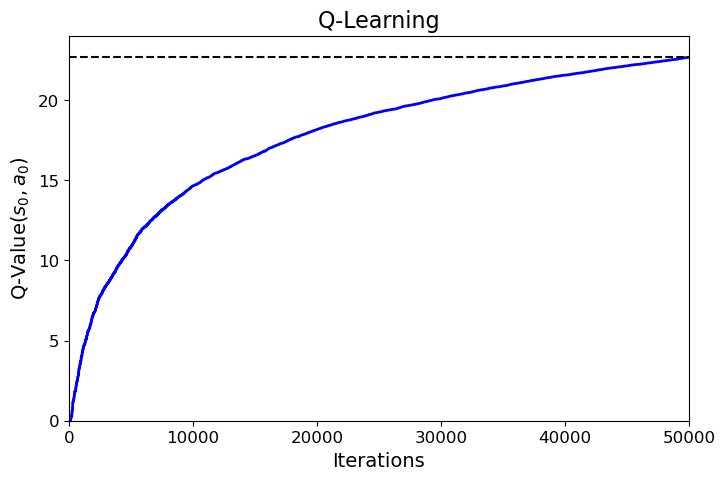

In [92]:
true_Q_value = history2[-1][0][0]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.arange(len(history2)), [history2[i][0][0] for i in range(len(history2))], "b-", linewidth=2)
ax.plot([0, len(history2)], [true_Q_value, true_Q_value], "k--")
ax.set_xlabel("Iterations", fontsize=14)
ax.set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
ax.set_title("Q-Learning", fontsize=16)
ax.axis([0, len(history2), 0, 24])
plt.show()



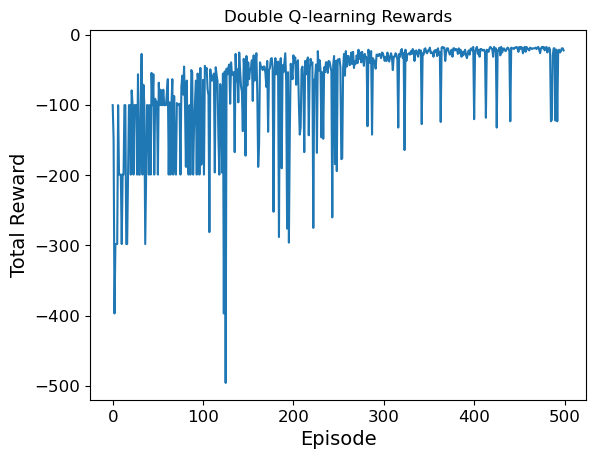

In [93]:
import numpy as np
import gym
import matplotlib.pyplot as plt

env = gym.make("CliffWalking-v0")

# Initialize Q1(s,a) and Q2(s,a) for all states s and actions a to zero
Q1 = np.zeros((env.observation_space.n, env.action_space.n))
Q2 = np.zeros((env.observation_space.n, env.action_space.n))

# Set other hyperparameters
num_episodes = 500
max_steps_per_episode = 100
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1

# Initialize variables for tracking rewards and steps per episode
episode_rewards = []
episode_steps = []

# Define a function for choosing an action based on an epsilon-greedy policy
def epsilon_greedy_policy(state, Q1, Q2, epsilon):
    if np.random.uniform() < epsilon:
        # Choose a random action with probability epsilon
        action = env.action_space.sample()
    else:
        # Choose the action with highest Q-value for the current state
        q1_values = Q1[state, :]
        q2_values = Q2[state, :]
        values = q1_values + q2_values
        action = np.argmax(values)
    return action

# Run the algorithm for a number of episodes
for episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0
    episode_step = 0
    done = False
    while not done and episode_step < max_steps_per_episode:
        # Choose an action using the epsilon-greedy policy
        action = epsilon_greedy_policy(state, Q1, Q2, epsilon)
        
        # Take a step in the environment
        next_state, reward, done, info = env.step(action)
        
        # Choose which Q-function to update
        if np.random.uniform() < 0.5:
            Q1_next_values = Q1[next_state, :]
            Q1_next_max = np.max(Q1_next_values)
            Q1[state, action] += learning_rate * (reward + discount_factor * Q2[next_state, np.argmax(Q1_next_values)] - Q1[state, action])
        else:
            Q2_next_values = Q2[next_state, :]
            Q2_next_max = np.max(Q2_next_values)
            Q2[state, action] += learning_rate * (reward + discount_factor * Q1[next_state, np.argmax(Q2_next_values)] - Q2[state, action])
        
        # Update variables for tracking rewards and steps per episode
        episode_reward += reward
        episode_step += 1
        
        # Update the current state
        state = next_state
    
    # Add episode reward and step count to their lists
    episode_rewards.append(episode_reward)
    episode_steps.append(episode_step)

# Plot the results
plt.plot(episode_rewards)
plt.title("Double Q-learning Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()
